<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 175)

In [61]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

# Data Gathering

In [62]:
df = pd.read_csv('car_dataset.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [64]:
df.shape

(301, 9)

In [65]:
df.head().T

,0,1,2,3,4
Car_Name,ritz,sx4,ciaz,wagon r,swift
Year,2014,2013,2017,2011,2014
Selling_Price,3.35,4.75,7.25,2.85,4.6
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000,43000,6900,5200,42450
Fuel_Type,Petrol,Diesel,Petrol,Petrol,Diesel
Seller_Type,Dealer,Dealer,Dealer,Dealer,Dealer
Transmission,Manual,Manual,Manual,Manual,Manual
Owner,0,0,0,0,0


# Data Preparation

In [66]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [67]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:>

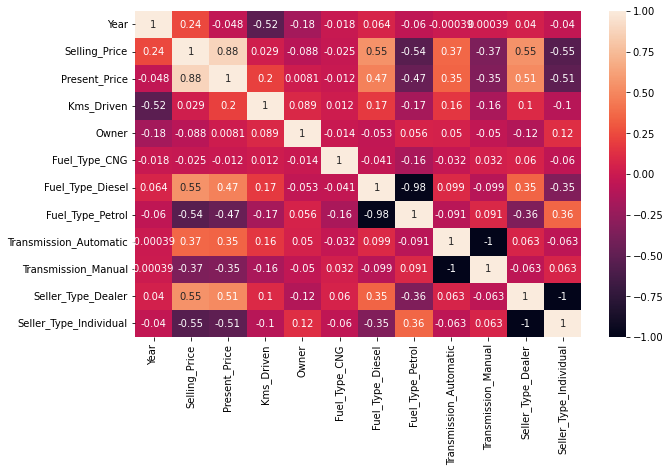

In [90]:
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [68]:
df = df.join(df['Fuel_Type'].str.get_dummies().add_prefix('Fuel_Type_'))

In [69]:
df = df.join(df['Transmission'].str.get_dummies().add_prefix('Transmission_'))

In [70]:
df = df.join(df['Seller_Type'].str.get_dummies().add_prefix('Seller_Type_'))

In [72]:
df.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)

In [73]:
df.head().T

,0,1,2,3,4
Year,2014.00,2013.00,2017.00,2011.00,2014.00
Selling_Price,3.35,4.75,7.25,2.85,4.60
Present_Price,5.59,9.54,9.85,4.15,6.87
Kms_Driven,27000.00,43000.00,6900.00,5200.00,42450.00
Owner,0.00,0.00,0.00,0.00,0.00
Fuel_Type_CNG,0.00,0.00,0.00,0.00,0.00
Fuel_Type_Diesel,0.00,1.00,0.00,0.00,1.00
Fuel_Type_Petrol,1.00,0.00,1.00,1.00,0.00
Transmission_Automatic,0.00,0.00,0.00,0.00,0.00
Transmission_Manual,1.00,1.00,1.00,1.00,1.00


### Features and target variable

In [74]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  Model Building (Linear Regression)

In [76]:
linearregression = LinearRegression()

In [77]:
linearregression.fit(X_train, y_train)

LinearRegression()

# Interpret the model

In [78]:
y_pred = linearregression.predict(X_test)
y_train_pred = linearregression.predict(X_train)

# Model Evaluation

In [79]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.882803,0.875616
mae,1.146981,1.269836
mse,2.876321,3.541749
rmse,1.695972,1.881953


### Cross validation

In [80]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [81]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.823462
test_neg_mean_absolute_error       -1.296764
test_neg_mean_squared_error        -5.125975
test_neg_root_mean_squared_error   -2.070421
dtype: float64

# Regularization

# Ridge

In [82]:
alpha_space = np.linspace(0.01, 1, 100)

In [83]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error",normalize=True)

In [84]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, normalize=True, scoring='neg_root_mean_squared_error')

In [85]:
ridge_cv_model.alpha_

0.18000000000000002

In [86]:
ridge_cv_model.best_score_

-1.8584708958564533

In [87]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [88]:
rs =train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rs

,ridge_cv_train,ridge_cv_test
R2,0.866490,0.844730
mae,1.197852,1.364711
mse,3.276687,4.421180
rmse,1.810162,2.102660


In [89]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test
R2,0.882803,0.875616,0.866490,0.844730
mae,1.146981,1.269836,1.197852,1.364711
mse,2.876321,3.541749,3.276687,4.421180
rmse,1.695972,1.881953,1.810162,2.102660


In [102]:
ridge_cv_model.coef_

array([ 2.82436802e-01,  3.29105571e-01, -4.40675314e-06, -8.17701324e-01,
       -1.75130931e+00,  1.32111149e+00, -1.16992821e+00,  9.17796196e-01,
       -9.17796196e-01,  8.43040282e-01, -8.43040282e-01])

# Lasso

In [91]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42,normalize=True) 

In [92]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, normalize=True, random_state=42)

In [93]:
lasso_cv_model.alpha_

0.03

In [94]:
y_pred = lasso_cv_model.predict(X_test) 
y_train_pred = lasso_cv_model.predict(X_train)

In [97]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.853615,0.823303
mae,1.178231,1.447106
mse,3.592673,5.031301
rmse,1.895435,2.243056


In [104]:
pd.concat([ls, rs,lcs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
R2,0.882803,0.875616,0.866490,0.844730,0.853615,0.823303
mae,1.146981,1.269836,1.197852,1.364711,1.178231,1.447106
mse,2.876321,3.541749,3.276687,4.421180,3.592673,5.031301
rmse,1.695972,1.881953,1.810162,2.102660,1.895435,2.243056


In [101]:
lasso_cv_model.coef_

array([ 2.62950144e-01,  3.99343980e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.39534705e+00, -0.00000000e+00,  8.48593616e-03,
       -0.00000000e+00,  6.85329360e-01, -2.05279004e-15])

## Elastic-Net 

In [105]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42,normalize=True)

In [106]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             normalize=True, random_state=42)

In [107]:
elastic_cv_model.alpha_

0.01

In [108]:
elastic_cv_model.l1_ratio_

0.9

In [109]:
y_pred = elastic_cv_model.predict(X_test)
y_train_pred = elastic_cv_model.predict(X_train)

In [110]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.853667,0.825217
mae,1.211819,1.410676
mse,3.591408,4.976809
rmse,1.895101,2.230876


In [111]:
elastic_cv_model.coef_

array([ 2.62323155e-01,  3.14051527e-01, -1.34720138e-06, -4.52217243e-01,
       -4.45366636e-01,  1.40184964e+00, -9.17289218e-01,  7.25255959e-01,
       -7.23608369e-01,  7.96855588e-01, -7.94897706e-01])

In [112]:
pd.concat([ls,rs,lcs,ecs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
R2,0.882803,0.875616,0.866490,0.844730,0.853615,0.823303,0.853667,0.825217
mae,1.146981,1.269836,1.197852,1.364711,1.178231,1.447106,1.211819,1.410676
mse,2.876321,3.541749,3.276687,4.421180,3.592673,5.031301,3.591408,4.976809
rmse,1.695972,1.881953,1.810162,2.102660,1.895435,2.243056,1.895101,2.230876
